In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
# %matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (24,8)

In [2]:
df = pd.read_csv('course_project_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [4]:
for c in df.columns:
    n_vals = df[c].unique().size
    print(f"{c:<30}   {str(df[c].dtype):<10}  {n_vals:<5} {'to_cat_candidate' if n_vals<20 else 'number'}")

Home Ownership                   object      4     to_cat_candidate
Annual Income                    float64     5479  number
Years in current job             object      12    to_cat_candidate
Tax Liens                        float64     8     to_cat_candidate
Number of Open Accounts          float64     39    number
Years of Credit History          float64     408   number
Maximum Open Credit              float64     6963  number
Number of Credit Problems        float64     8     to_cat_candidate
Months since last delinquent     float64     90    number
Bankruptcies                     float64     6     to_cat_candidate
Purpose                          object      15    to_cat_candidate
Term                             object      2     to_cat_candidate
Current Loan Amount              float64     5386  number
Current Credit Balance           float64     6592  number
Monthly Debt                     float64     6716  number
Credit Score                     float64     269   number
Cr

In [5]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [6]:
'''                                                                    
Home Ownership                   object      4     to_cat_candidate    cat
Annual Income                    float64     5479  number              number-------------5943 non-null
Years in current job             object      12    to_cat_candidate    try факторизацию---7129 non-null
Tax Liens                        float64     8     to_cat_candidate    number
Number of Open Accounts          float64     39    number              number
Years of Credit History          float64     408   number              number
Maximum Open Credit              float64     6963  number              number
Number of Credit Problems        float64     8     to_cat_candidate    number
Months since last delinquent     float64     90    number              number-------------3419 non-null
Bankruptcies                     float64     6     to_cat_candidate    number-------------7486 non-null    
Purpose                          object      15    to_cat_candidate    cat    
Term                             object      2     to_cat_candidate    bin
Current Loan Amount              float64     5386  number              number
Current Credit Balance           float64     6592  number              number
Monthly Debt                     float64     6716  number              number
Credit Score                     float64     269   number              number------------5943 non-null
Credit Default                   int64       2                ******
'''
print()

In [7]:
df['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [8]:
(df['Annual Income'].isnull() & df['Credit Score'].isnull()).astype('int').sum()


1557

In [9]:
# df['Credit Score_0'] = df['Credit Score'].fillna(0) не будем
#BASE_FEATURE_NAMES.remove('Credit Score_0')

In [10]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()

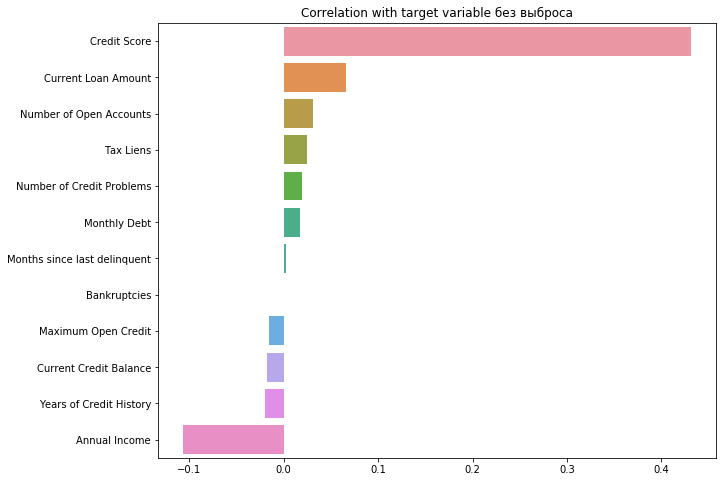

In [11]:
corr_with_target = \
df[df['Current Loan Amount'] != 99999999][BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable без выброса')
plt.show()

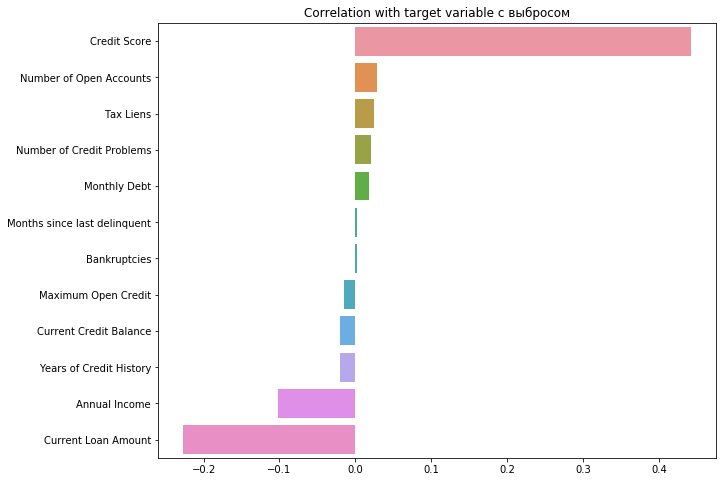

In [12]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable с выбросом')
plt.show()

## Распределения числовых переменных

### 'Annual Income'

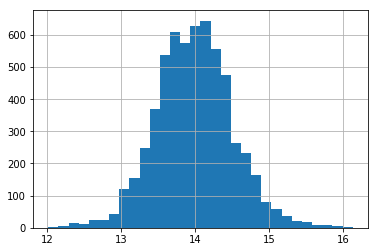

In [13]:
df['Annual Income'].apply(np.log).hist(bins=30)
plt.show()

### 'Number of Open Accounts'

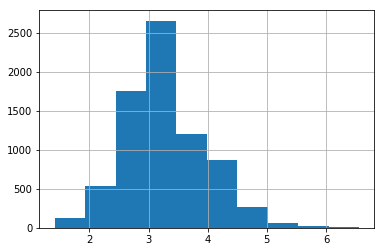

In [14]:
df['Number of Open Accounts'].apply(np.sqrt).hist()
plt.show()

### 'Years of Credit History'

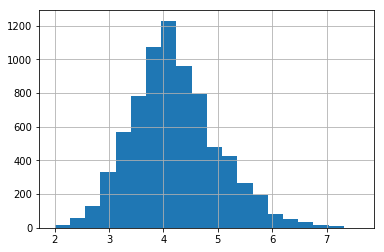

In [15]:
df['Years of Credit History'].apply(np.sqrt).hist(bins=20)
plt.show()

### 'Maximum Open Credit'

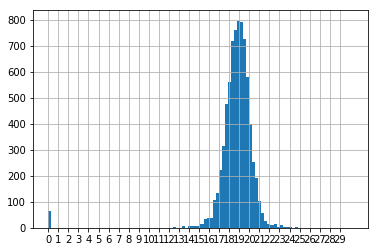

In [16]:
pl = (df['Maximum Open Credit']+1).apply(np.log2).hist(bins=100)
pl.set_xticks(range(30))
plt.show()

In [17]:
# выбросами являются значения 0 и >10M
df.loc[df['Maximum Open Credit'] == 0, 'Maximum Open Credit'].shape,\
df.loc[df['Maximum Open Credit'] > 2**23, 'Maximum Open Credit'].shape

((65,), (27,))

In [18]:
med = df['Maximum Open Credit'].median()

In [19]:
# заменим верхний выброс медианой

df.loc[df['Maximum Open Credit'] > 2**23, 'Maximum Open Credit'] = med

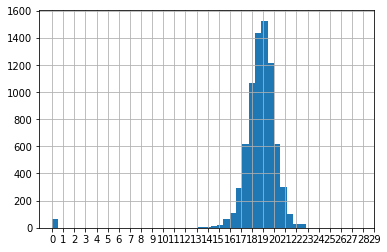

In [20]:
pl = (df['Maximum Open Credit']+1).apply(np.log2).hist(bins=40)
pl.set_xticks(range(30))
plt.show()

In [21]:
df.loc[df['Maximum Open Credit']==0, TARGET_NAME].mean(), df.loc[df['Maximum Open Credit']!=0, TARGET_NAME].mean()

(0.15384615384615385, 0.28285137861466036)

In [22]:
# Нижний выброс оказывает существенное влияние на целевую переменную, введем дополнительную переменную, а 0 заменим на null
df['no more Open Credit'] = np.where(df['Maximum Open Credit']==0, 1, 0)

df['Maximum Open Credit'] = np.where(df['Maximum Open Credit']==0, np.nan, df['Maximum Open Credit'])

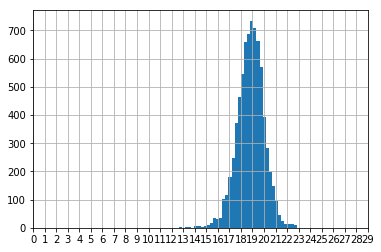

In [23]:
pl = (df['Maximum Open Credit']+1).apply(np.log2).hist(bins=40)
pl.set_xticks(range(30))
plt.show()

In [24]:
BASE_FEATURE_NAMES.append('no more Open Credit')

### 'Current Loan Amount'

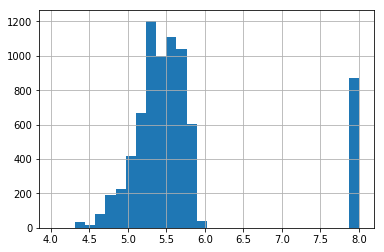

In [25]:
df['Current Loan Amount'].apply(np.log10).hist(bins=30)

In [26]:
df['is_fliyer Current Loan Amount'] = np.where(df['Current Loan Amount']>=10**7, 1, 0)

df['Current Loan Amount'] = np.where(df['Current Loan Amount']>=10**7, np.nan, df['Current Loan Amount'])

In [27]:
BASE_FEATURE_NAMES.append('is_fliyer Current Loan Amount')

### 'Current Credit Balance'

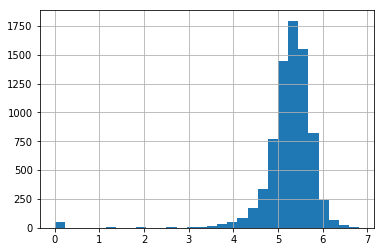

In [28]:
(df['Current Credit Balance'] + 1).apply(np.log10).hist(bins=30)
plt.show()

### 'Monthly Debt'

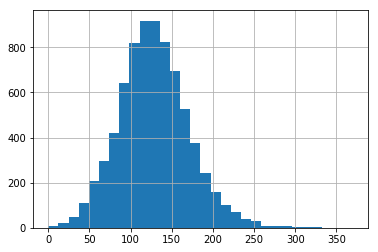

In [29]:
(df['Monthly Debt']).apply(np.sqrt).hist(bins=30)
plt.show()

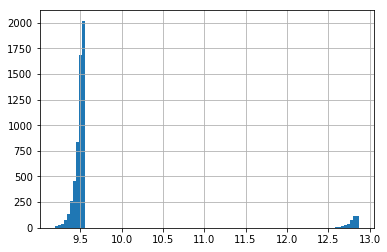

In [30]:
(df['Credit Score']).apply(np.log2).hist(bins=100)
plt.show()

In [31]:
(df['Credit Score']<2000).astype('int').sum(), (df['Credit Score']>=2000).astype('int').sum()

(5543, 400)

In [32]:
df.loc[df['Credit Score']<2000, TARGET_NAME].mean(), df.loc[df['Credit Score']>=2000, TARGET_NAME].mean()

(0.21360274219736605, 1.0)

In [33]:
df['high Credit Score'] = np.where(df['Credit Score']>=2000, 1, 0)

df['Credit Score'] = np.where(df['Credit Score']>=2000, np.nan, df['Credit Score'])

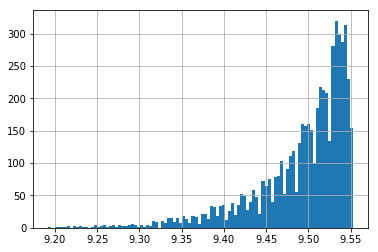

In [34]:
(df['Credit Score']).apply(np.log2).hist(bins=100)
plt.show()

In [35]:
BASE_FEATURE_NAMES.append('high Credit Score')

## 'Years in current job' - лабелизация

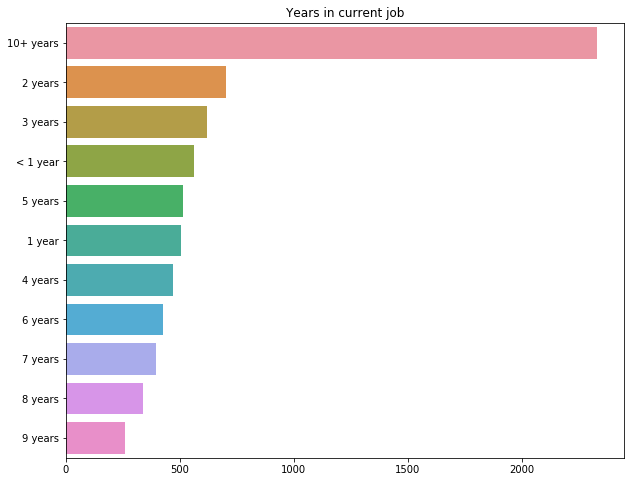

In [36]:
y = df['Years in current job'].value_counts().index
x = list(df['Years in current job'].value_counts())

plt.figure(figsize=(10, 8))

sns.barplot(x=x, y=y)

plt.title('Years in current job')
plt.show()

In [37]:
Years_in_cj_dict = {'10+ years':10, '2 years':2, '3 years':3, '< 1 year':0, '5 years':5, '1 year':1,
       '4 years':4, '6 years':6, '7 years':7, '8 years':8, '9 years':9}

In [38]:
df['int Years in current job'] = df['Years in current job'].map(Years_in_cj_dict)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,no more Open Credit,is_fliyer Current Loan Amount,high Credit Score,int Years in current job
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,...,Short Term,NaN,47386.0,7914.0,749.0,0,0,1,0,NaN
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,...,Long Term,264968.0,394972.0,18373.0,737.0,1,0,0,0,10.0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,...,Short Term,NaN,308389.0,13651.0,742.0,0,0,1,0,8.0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,...,Short Term,121396.0,95855.0,11338.0,694.0,0,0,0,0,6.0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,...,Short Term,125840.0,93309.0,7180.0,719.0,0,0,0,0,8.0


In [39]:
BASE_FEATURE_NAMES.append('int Years in current job')

## Влияние числовых переменных на цель

In [40]:
df[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

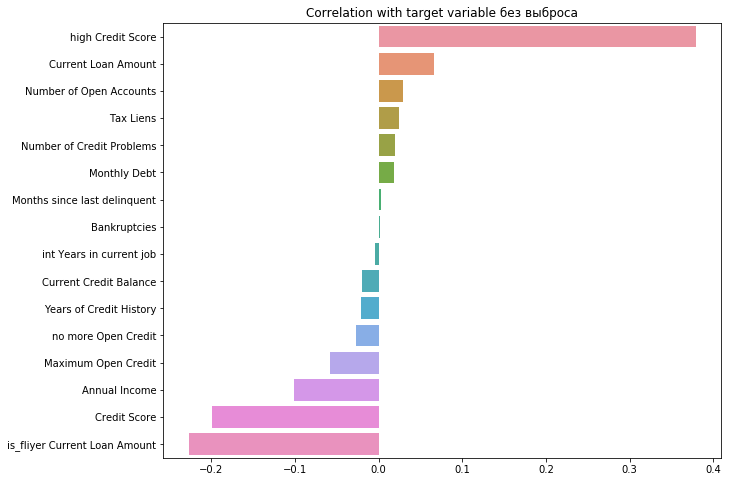

In [41]:
corr_with_target = \
df[df['Current Loan Amount'] != 99999999][BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable без выброса')
plt.show()

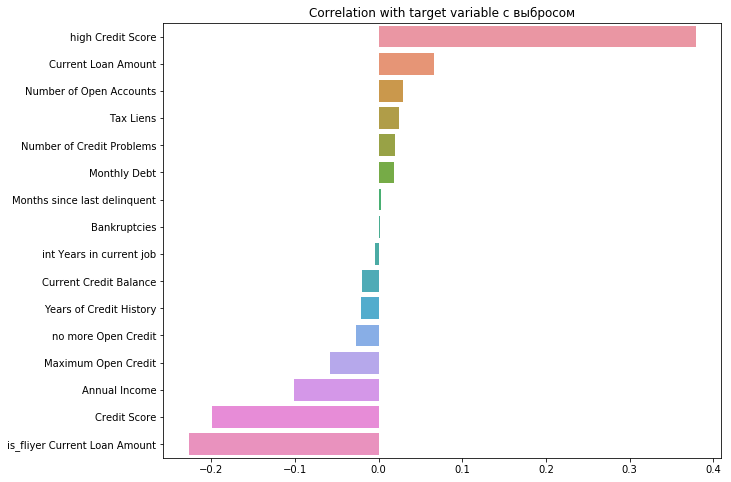

In [42]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable с выбросом')
plt.show()

In [43]:
BASE_FEATURE_NAMES.remove('Months since last delinquent') # удаляем 

In [44]:
BASE_FEATURE_NAMES.remove('Bankruptcies') # удаляем

In [45]:
BASE_FEATURE_NAMES

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'no more Open Credit',
 'is_fliyer Current Loan Amount',
 'high Credit Score',
 'int Years in current job']

## Корреляции независимых переменных

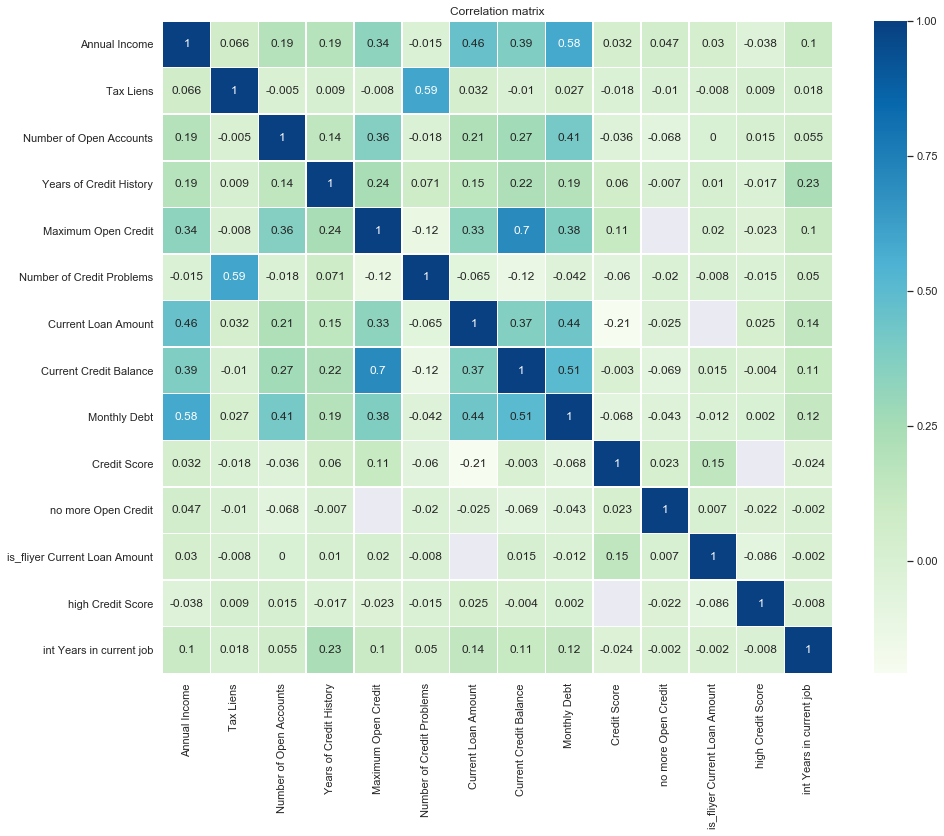

In [46]:
plt.figure(figsize = (15,12))

sns.set(font_scale=1)
sns.heatmap(df[df['Current Loan Amount'] != 99999999][BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

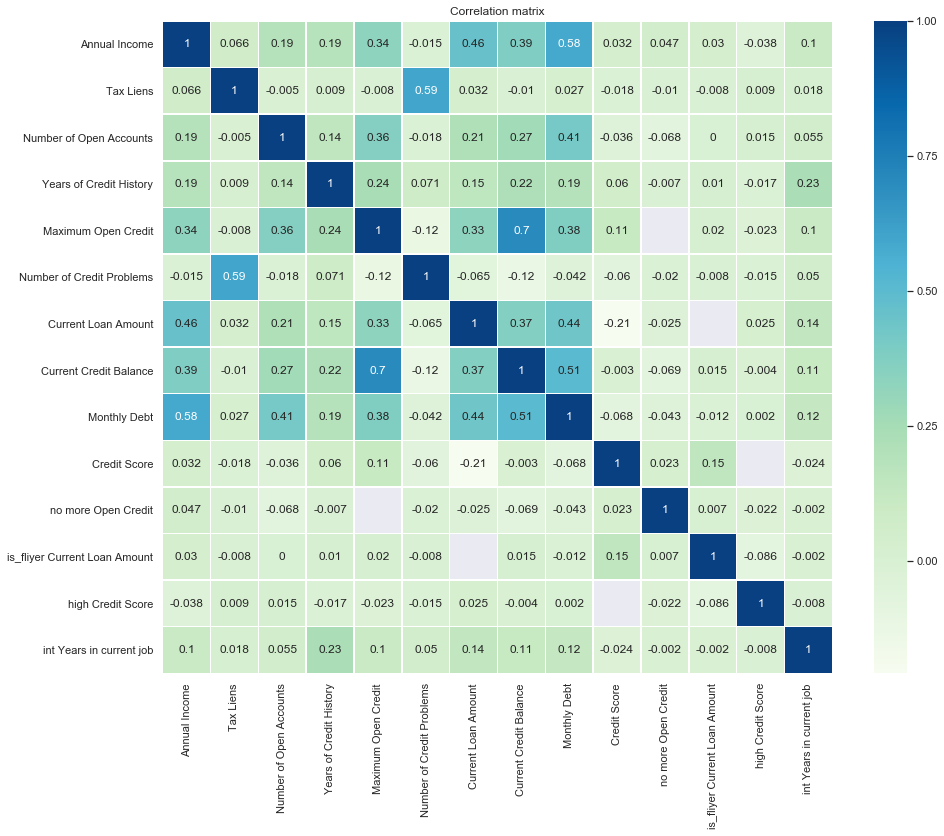

In [47]:
plt.figure(figsize = (15,12))

sns.set(font_scale=1)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [48]:
pd.qcut(df['Current Loan Amount'], 5, duplicates='drop').unique()

[NaN, (223027.2, 325780.4], (11241.999, 147892.8], (325780.4, 449728.4], (449728.4, 789030.0], (147892.8, 223027.2]]
Categories (5, interval[float64]): [(11241.999, 147892.8] < (147892.8, 223027.2] < (223027.2, 325780.4] < (325780.4, 449728.4] < (449728.4, 789030.0]]

In [49]:
pd.cut(df['Current Loan Amount'], 5, duplicates='drop').unique()

[NaN, (166799.6, 322357.2], (10464.212, 166799.6], (322357.2, 477914.8], (477914.8, 633472.4], (633472.4, 789030.0]]
Categories (5, interval[float64]): [(10464.212, 166799.6] < (166799.6, 322357.2] < (322357.2, 477914.8] < (477914.8, 633472.4] < (633472.4, 789030.0]]

In [50]:
df[df['Current Loan Amount'] != 99999999].describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,no more Open Credit,is_fliyer Current Loan Amount,high Credit Score,int Years in current job
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.435000e+03,7500.000000,3419.000000,7486.000000,6630.000000,7.500000e+03,7500.000000,5543.000000,7500.000000,7500.000000,7500.000000,7500.000000,7129.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,6.396396e+05,0.170000,34.692600,0.117152,309024.390347,2.898332e+05,18314.454133,720.705935,0.281733,0.008667,0.116000,0.053333,5.880348
std,8.453392e+05,0.271604,4.908924,7.041946,6.141059e+05,0.498598,21.688806,0.347192,182294.008621,3.178714e+05,11926.764673,27.651126,0.449874,0.092697,0.320246,0.224712,3.620092
min,1.645970e+05,0.000000,2.000000,4.000000,4.334000e+03,0.000000,0.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.844050e+05,0.000000,16.000000,0.000000,172744.000000,1.142565e+05,10067.500000,709.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.794680e+05,0.000000,32.000000,0.000000,265826.000000,2.093230e+05,16076.500000,729.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.920660e+05,0.000000,50.000000,0.000000,430100.000000,3.604062e+05,23818.000000,741.000000,1.000000,0.000000,0.000000,0.000000,10.000000
max,1.014934e+07,7.000000,43.000000,57.700000,7.526552e+06,7.000000,118.000000,4.000000,789030.000000,6.506797e+06,136679.000000,751.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [51]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,no more Open Credit,is_fliyer Current Loan Amount,high Credit Score,int Years in current job
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.435000e+03,7500.000000,3419.000000,7486.000000,6630.000000,7.500000e+03,7500.000000,5543.000000,7500.000000,7500.000000,7500.000000,7500.000000,7129.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,6.396396e+05,0.170000,34.692600,0.117152,309024.390347,2.898332e+05,18314.454133,720.705935,0.281733,0.008667,0.116000,0.053333,5.880348
std,8.453392e+05,0.271604,4.908924,7.041946,6.141059e+05,0.498598,21.688806,0.347192,182294.008621,3.178714e+05,11926.764673,27.651126,0.449874,0.092697,0.320246,0.224712,3.620092
min,1.645970e+05,0.000000,2.000000,4.000000,4.334000e+03,0.000000,0.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.844050e+05,0.000000,16.000000,0.000000,172744.000000,1.142565e+05,10067.500000,709.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.794680e+05,0.000000,32.000000,0.000000,265826.000000,2.093230e+05,16076.500000,729.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.920660e+05,0.000000,50.000000,0.000000,430100.000000,3.604062e+05,23818.000000,741.000000,1.000000,0.000000,0.000000,0.000000,10.000000
max,1.014934e+07,7.000000,43.000000,57.700000,7.526552e+06,7.000000,118.000000,4.000000,789030.000000,6.506797e+06,136679.000000,751.000000,1.000000,1.000000,1.000000,1.000000,10.000000
